In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [4]:
DATA = r"C:\Users\Hipor\projects\practical-statistics-for-data-scientists\data"
print(DATA)

C:\Users\Hipor\projects\practical-statistics-for-data-scientists\data


In [5]:
AIRLINE_STATS_CSV = DATA + '\\airline_stats.csv'
KC_TAX_CSV = DATA + '\kc_tax.csv.gz'
LC_LOANS_CSV = DATA + '\lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA + '\dfw_airline.csv'
SP500_DATA_CSV = DATA + '\sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA + '\sp500_sectors.csv'
STATE_CSV = DATA + '\state.csv'
print(STATE_CSV)

C:\Users\Hipor\projects\practical-statistics-for-data-scientists\data\state.csv


In [6]:
state = pd.read_csv(STATE_CSV)
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
print("Среднее значение: ",state["Population"].mean())
print("Медиана: ",state["Population"].median())
print("Урезанное среднее на 10%: ",trim_mean(state["Population"],0.1))

Среднее значение:  6162876.3
Медиана:  4436369.5
Урезанное среднее на 10%:  4783697.125


In [8]:
print("Среднее значение: ",state["Murder.Rate"].mean())
print("Медиана: ",state["Murder.Rate"].median())
print("Урезанное среднее на 10%: ",trim_mean(state["Murder.Rate"],0.1))
print("Средне взшешанное: ", np.average(state["Murder.Rate"], weights=state.Population))
print("Медиана взшешанная: ", wquantiles.median(state["Murder.Rate"], weights=state.Population))

Среднее значение:  4.066
Медиана:  4.0
Урезанное среднее на 10%:  3.9450000000000003
Средне взшешанное:  4.445833981123393
Медиана взшешанная:  4.4


In [9]:
#for i in range(len(state.Population.index)):
#    state.loc[i, 'Population'] = state.loc[i, 'Population'] / 1e6
print(state.head())
print(state[np.logical_and(state.Population < state.Population.quantile(0.9), state.Population > state.Population.quantile(0.1))].describe())
print(state.describe())

        State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA
         Population  Murder.Rate
count  4.000000e+01    40.000000
mean   4.783697e+06     4.127500
std    3.061797e+06     2.021929
min    8.979340e+05     0.900000
25%    2.540208e+06     2.400000
50%    4.436370e+06     4.000000
75%    6.414963e+06     5.625000
max    1.270238e+07    10.300000
         Population  Murder.Rate
count  5.000000e+01    50.000000
mean   6.162876e+06     4.066000
std    6.848235e+06     1.915736
min    5.636260e+05     0.900000
25%    1.833004e+06     2.425000
50%    4.436370e+06     4.000000
75%    6.680312e+06     5.550000
max    3.725396e+07    10.300000


Стандартное отклонение уменьшаеться вдвое при отбрасывании 10% квантилей с двух сторон, особенно влияет максимальные значения

In [10]:
print(state['Population'].std()) #стнадартное отклонение
qstd = state['Population'].quantile(0.75)-state['Population'].quantile(0.25)
print(state['Population'].quantile(0.75)-state['Population'].quantile(0.25)) #Разница квантилей
print(robust.scale.mad(state['Population'])) #Абсолютное отклонение от медианы
print("размах квантилей умноженный на 1.5: ", qstd*1.5)

6848235.347401142
4847308.0
3849876.1459979336
размах квантилей умноженный на 1.5:  7270962.0


In [11]:
print(state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95]))
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p*100}%' for p in percentages]
print(df)

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64
       Murder.Rate
5.0%         1.600
25.0%        2.425
50.0%        4.000
75.0%        5.550
95.0%        6.510


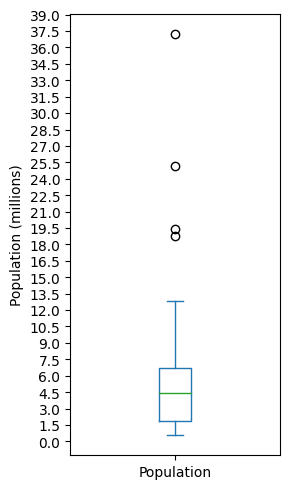

8     18801310
31    19378102
42    25145561
4     37253956
Name: Population, dtype: int64

In [12]:
ax = (state['Population']/1e6).plot.box(figsize=(3,5))
ax.set_ylabel('Population (millions)')
ax.set_yticks(np.arange(0,40,1.5))
plt.tight_layout()
plt.show()
state['Population'].sort_values().tail(4)

Коробчатая диаграмма нижня и верхняя часть коробки - 25 и 75 квантили, усы - это квантильный размах умноженный на 1,5. Нижний ус соответсвует минимуму, так как им все заканчивается

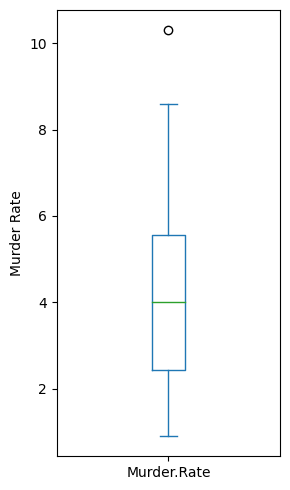

In [13]:
ay = state['Murder.Rate'].plot.box(figsize=(3,5))
ay.set_ylabel('Murder Rate')

plt.tight_layout()
plt.show()

In [14]:
print((state['Population'].sort_values()[:-5].quantile(0.75)-
        state['Population'].sort_values()[:-5].quantile(0.25))*1.5+
        state['Population'].sort_values()[:-5].quantile(0.75)) 

13513889.5


In [15]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


In [16]:
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by=['binnedPopulation'])

groups = []
for group, subset in df.groupby('binnedPopulation'):
    groups.append({'BinRange' : group,
                   'Count': len(subset),
                   'States' : ','.join(subset.Abbreviation)}
                   )
pd.DataFrame(groups).head(10)




,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,NV,MS,NH,NM,ND,OK,ME,OR,RI,KS,IA,MT,NE,ID,H..."
1,"(4232659.0, 7901692.0]",14,"TN,WA,SC,AL,MN,AZ,CO,IN,WI,LA,MD,KY,MA,MO"
2,"(7901692.0, 11570725.0]",6,"NC,GA,MI,VA,NJ,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


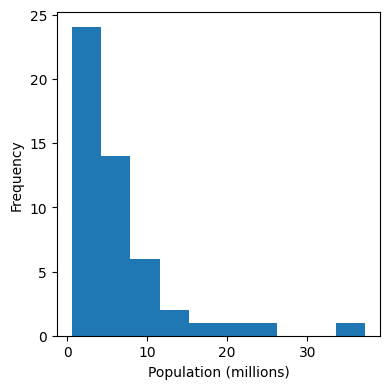

In [17]:
ax = (state["Population"]/1e6).plot.hist(figsize=(4,4))
ax.set_xlabel("Population (millions)")

plt.tight_layout()
plt.show()

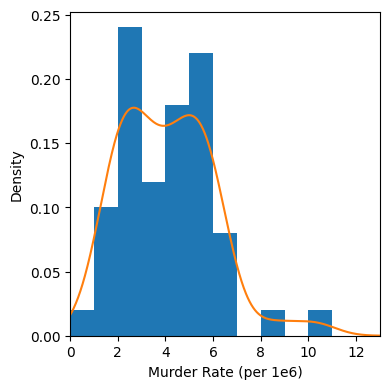

In [18]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,13], bins=range(0,13,1),figsize=(4,4))

state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 1e6)')

plt.tight_layout()
plt.show()

In [19]:
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


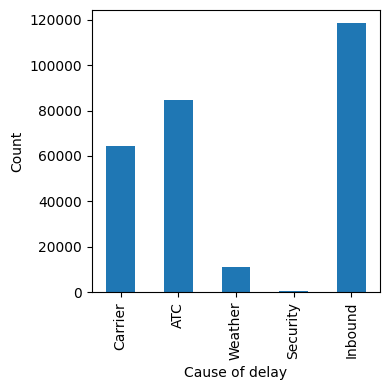

In [20]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False)
ax.set_ylabel('Count')
ax.set_xlabel('Cause of delay')

plt.tight_layout()
plt.show()

In [21]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)


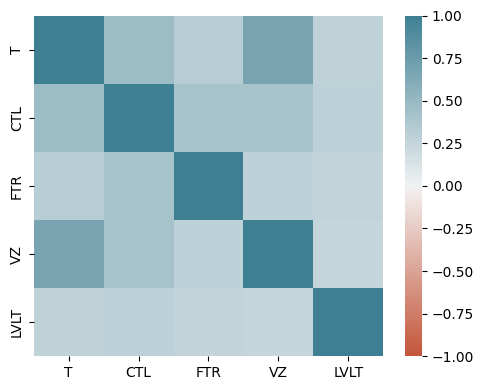

In [22]:
telecimSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecimSymbols]
telecom.corr()
plt.figure(figsize = (5,4))
ax = sns.heatmap(telecom.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True))

plt.tight_layout()
plt.show()

In [23]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


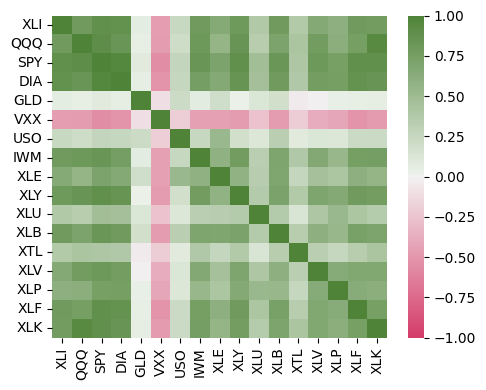

In [24]:
plt.figure(figsize = (5,4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(000000, 12000, as_cmap=True))

plt.tight_layout()
plt.show()

alpha параметр отвечающий за прозрачность точек

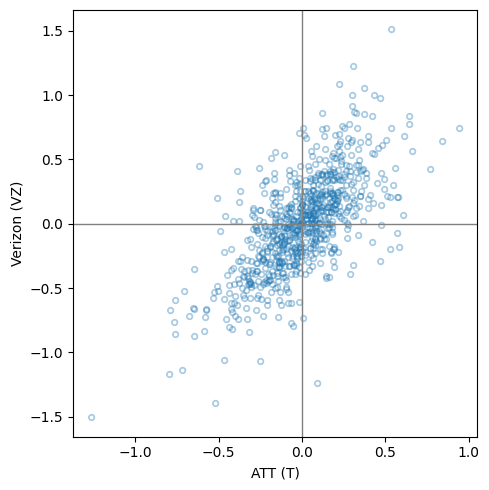

In [25]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(5,5), marker='$\u25EF$', alpha=0.3)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

In [26]:
kc_tax = pd.read_csv(KC_TAX_CSV)

kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)
haha = kc_tax[(kc_tax['TaxAssessedValue'] < 750000) & (kc_tax['SqFtTotLiving'] > 100)
               & (kc_tax['SqFtTotLiving'] < 3500)]
haha.shape

(432693, 3)


(432693, 3)

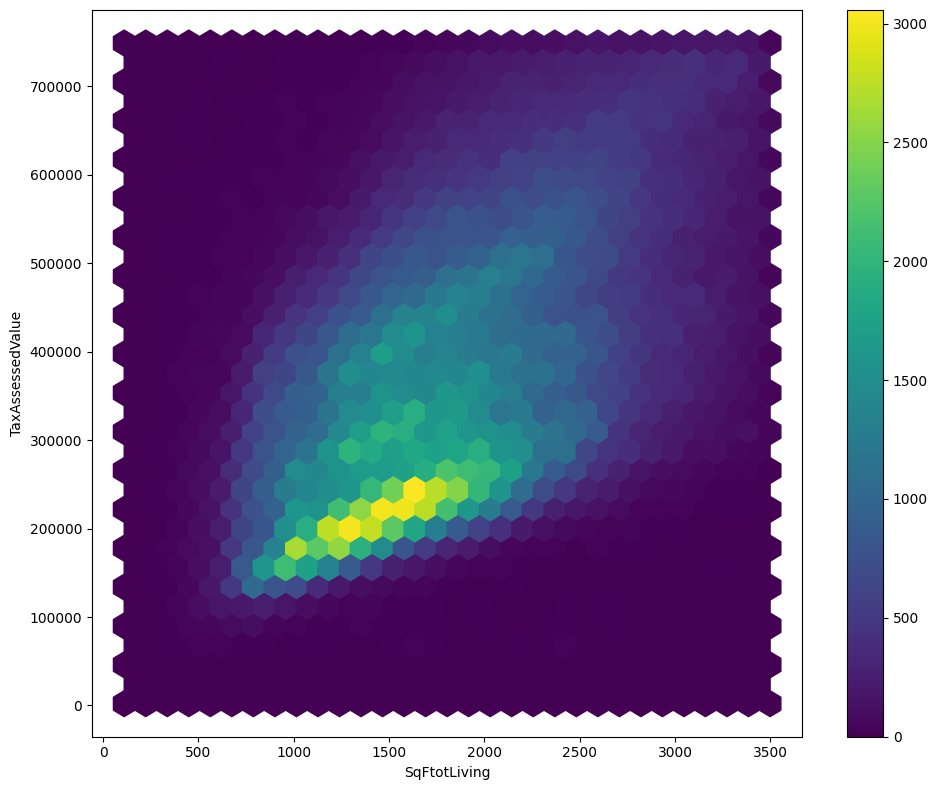

In [27]:
ax = kc_tax0.plot.hexbin(x="SqFtTotLiving", y='TaxAssessedValue',
                          gridsize=30, sharex=True, figsize=(10,8), cmap='viridis')
ax.set_xlabel('SqFtotLiving')
ax.set_ylabel('TaxAssessedValue')

plt.tight_layout()
plt.show()

In [28]:
#ax = sns.kdeplot(data=kc_tax0, x="SqFtTotLiving", y="TaxAssessedValue", figsize=(10,8))
#ax.set_xlabel("SqFtTotLiving")
#ax.set_ylabel("TaxAssessedValue")

#plt.tight_layout()
#plt.show()

In [29]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [30]:
crosstab = lc_loans.pivot_table(index='grade', columns='status',
                                 aggfunc= lambda x: len(x), margins=True)
crosstab.head(10)

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [31]:
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


In [32]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


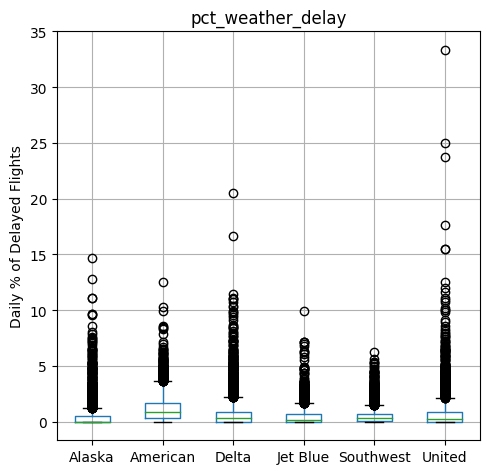

In [33]:
ax = airline_stats.boxplot(by='airline', column='pct_weather_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

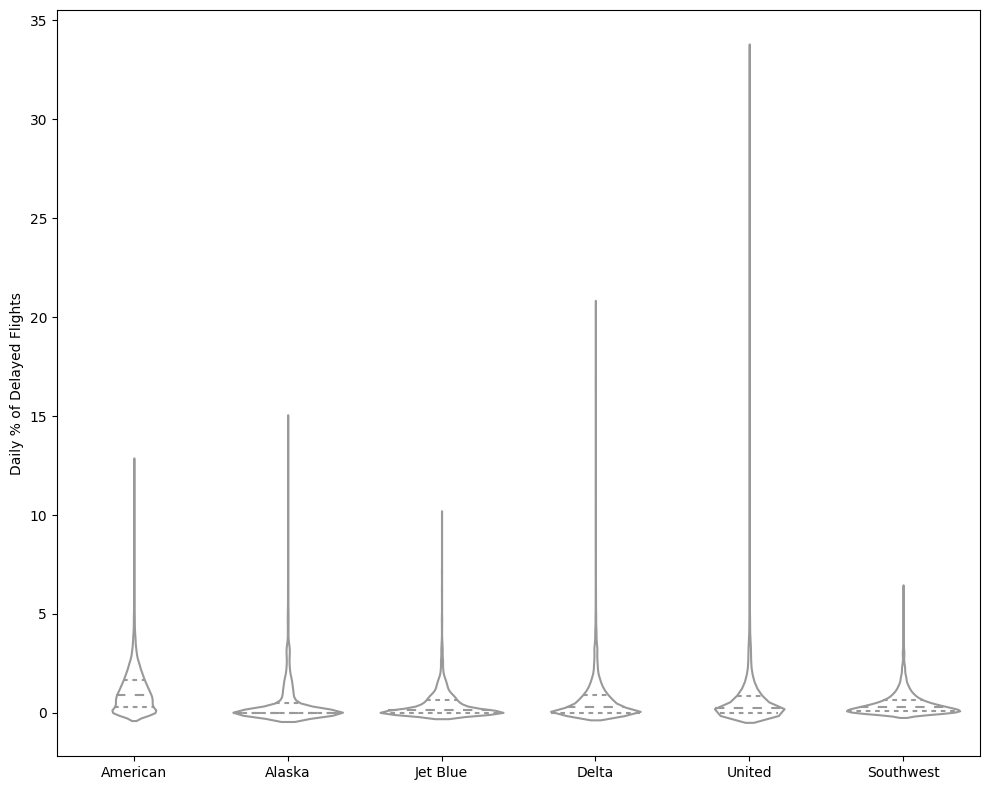

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(data=airline_stats, x='airline', y='pct_weather_delay', ax=ax, inner='quartile',
               color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

In [35]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]


,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


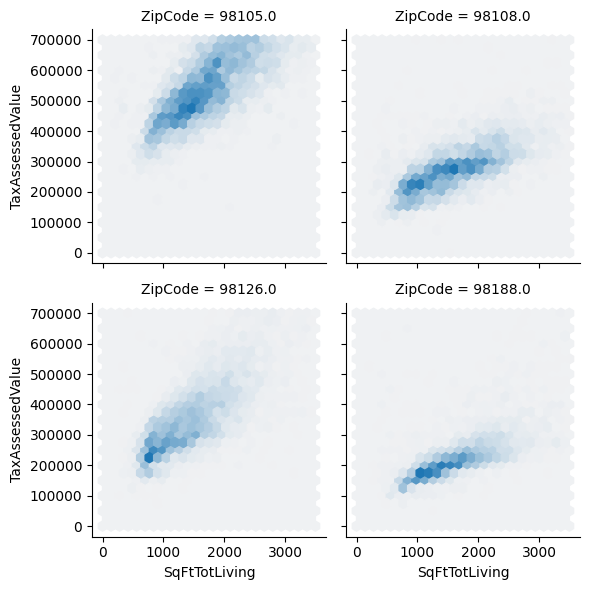

In [37]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])